In [13]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import turicreate as tc

In [3]:
df_pd = pd.read_csv('question 1.csv')
df_pd

,Row Labels,Number_of_assigned_group,BUSINESS_COMPLETION_HRS
0,IN10065871,3,8.02
1,IN10056052,1,8.04
2,IN10170129,1,8.07
3,IN10059571,2,8.08
4,IN10220214,2,8.11
...,...,...,...
47140,IN10177348,3,6053.75
47141,IN10179217,4,6262.33
47142,IN10060391,1,6369.75
47143,IN10060715,2,6782.34


[]

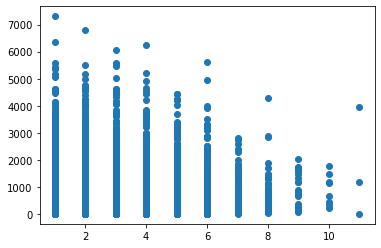

In [22]:
plt.scatter(x=df_pd['Number_of_assigned_group'], y=df_pd['BUSINESS_COMPLETION_HRS'])
plt.plot()


In [9]:
df_pd.groupby("Number_of_assigned_group")['BUSINESS_COMPLETION_HRS'].describe()

,count,mean,std,min,25%,50%,75%,max
Number_of_assigned_group,,,,,,,,
1,26849.0,262.314706,410.326411,8.04,64.2300,112.530,270.0000,7307.21
2,11395.0,305.301025,473.283400,8.08,67.4650,133.580,324.0750,6782.34
3,4943.0,378.352381,558.166870,8.02,75.7550,165.000,437.2250,6053.75
4,2277.0,423.077633,607.772065,8.31,79.4400,186.900,508.3500,6262.33
5,984.0,507.685234,691.954139,8.72,87.8075,221.790,616.3775,4424.32
6,443.0,557.286208,766.626264,20.70,110.6600,232.120,682.9300,5631.10
7,156.0,530.759423,578.743973,20.78,138.2400,309.125,711.3000,2800.63
8,62.0,683.650968,764.647394,36.82,205.3350,454.320,842.1500,4300.35
9,25.0,903.520800,616.729659,89.04,295.8500,759.720,1492.9300,2050.30


In [10]:
df_pd.corr(method='pearson')

,Number_of_assigned_group,BUSINESS_COMPLETION_HRS
Number_of_assigned_group,1.000000,0.139293
BUSINESS_COMPLETION_HRS,0.139293,1.000000


In [15]:
data_tc = tc.SFrame('question 1.csv')
data_tc

Finished parsing file /home/kchow3/CANDEV/question 1.csv

Parsing completed. Parsed 100 lines in 0.049773 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/kchow3/CANDEV/question 1.csv

Parsing completed. Parsed 47145 lines in 0.058819 secs.

Row Labels,Number_of_assigned_group,BUSINESS_COMPLETION_HRS
IN10065871,3,8.02
IN10056052,1,8.04
IN10170129,1,8.07
IN10059571,2,8.08
IN10220214,2,8.11
IN10203377,1,8.17
IN10065222,1,8.18
IN10129942,2,8.18
IN10105926,2,8.22
IN10150567,2,8.24


In [16]:
model = tc.linear_regression.create(data_tc, features=['Number_of_assigned_group'], target='BUSINESS_COMPLETION_HRS')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 44787

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.109824     | 7048.363902        | 4483.134782          | 466.382521                      | 485.303203                        |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [17]:
model.coefficients

name,index,value,stderr
(intercept),None,202.10639095597702,4.033671262728805
Number_of_assigned_group,None,56.73970682488898,1.916056298475634


In [19]:
model.evaluate(data_tc)

{'max_error': 7048.363902219134, 'rmse': 467.3470546545454}